In [1]:
project_name = "NETFLIX DATA ANALYSIS AND VIRTUALIZATION" 

In [1]:
import numpy as np
import jovian
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### I have manually uploaded the data set. Lets read it now using read_csv command

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')

In [3]:
netflix_df.head() #shows the first two rows in the data set 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix_df.isnull().sum() #to check for null values

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

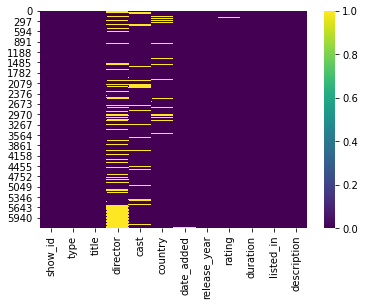

In [5]:
sns.heatmap(netflix_df.isnull(),cmap = 'viridis')

#### here we can see that most of the Null values are present in dirctor, few in cast and few in date added and rating

#### so first, lets replace all countries have null values to United states

In [6]:
netflix_df['country'].replace(np.nan, 'United States',inplace  = True)

##### So at first we remove the director and cast column since it wont bring out significant change

In [7]:
netflix_df.drop(['director','cast'],axis = 1,inplace = True)

In [8]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      11
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

##### Now we can see that date_added and rating has null values
lets drop date_added 

In [9]:
netflix_df.drop(['date_added'],axis = 1,inplace = True)

In [10]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
country          0
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

#### Now we can see that there are null values present in the rating, to rectify this, lets first check the most common rating type an replace the null values with it

In [11]:
netflix_df['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

#### As we can see, the most common type of rating among all ratings is TV-MA, so lets replace all the null values with TV-MA

In [12]:
netflix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

#### Now, let's check the null values present again.

In [13]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Cool! So, now we are done dealing all the missing data.
Let's look at the data frame now and go ahead with analysing and visualisation!

In [14]:
netflix_df

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


##### Let's have a look at few of the early releases 

In [15]:
old_movies=netflix_df.sort_values("release_year",ascending=True)
old_movies[['title','release_year']][:10]

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
2011,Prelude to War,1942
2013,The Battle of Midway,1942
2022,Undercover: How to Operate Behind Enemy Lines,1943
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2012,San Pietro,1945


##### Let's count the number of movies released in the year 2019

In [16]:
m1=netflix_df['type']=='Movie'
m2=netflix_df['release_year']==2019
netflix_df[m1 & m2].shape

(400, 9)

##### Let's count the number of movies/tv shows released in each year

In [17]:
names_counts_df = netflix_df.groupby('release_year')[['title']].count()

In [18]:
names_counts_df

,title
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
...,...
2016,830
2017,959
2018,1063


#### Lets Look at few latest releases

In [19]:
old_movies=netflix_df.sort_values("release_year",ascending=False)
old_movies[['title','release_year']][:10]

,title,release_year
3467,Medical Police,2020
3249,All the Freckles in the World,2020
3220,Dracula,2020
3427,Leslie Jones: Time Machine,2020
3436,The Healing Powers of Dude,2020
3195,"Live Twice, Love Once",2020
3189,Cheer,2020
3464,AJ and the Queen,2020
3180,Bulletproof 2,2020
3466,Jamtara - Sabka Number Ayega,2020


###### Let's Look at the total counts of movies an Tv sho

In [20]:
netflix_df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

##### so we see that there are 4265 movies and 1969 TV shows present in the data set. Now lets look at the same via Pie chart

<AxesSubplot:ylabel='type'>

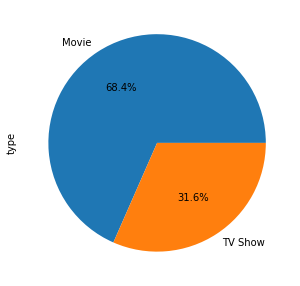

In [21]:
netflix_df['type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,5))

##### we can now see that 60.4% of shows present are movies and 31.6% are TV shows

##### Let's look at the distribution of the release year for Movies and Tv shows

<AxesSubplot:>

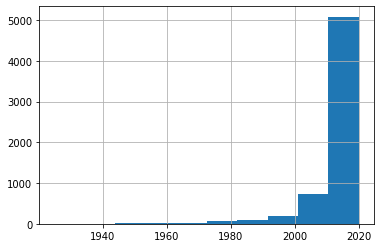

In [22]:
netflix_df['release_year'].hist()

###### In order for me to view the distribution of movies or Tv shows seperately, I will divide the data sets into two.

In [23]:
movies=netflix_df[netflix_df['type']=='Movie']
movies.head(5)

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,"Bulgaria, United States, Spain, Canada",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,Chile,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


####  data frame of 5 rows containing just Movies

In [24]:
tv_shows=netflix_df[netflix_df['type']=='TV Show']
tv_shows.head(5)

,show_id,type,title,country,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,Spain,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,United States,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,United States,2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


###### data frame of 5 rows containing just TV shows

<AxesSubplot:xlabel='release_year', ylabel='Density'>

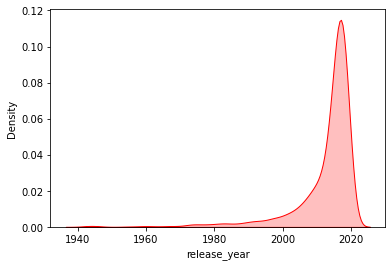

In [25]:
sns.kdeplot(movies['release_year'],color='r',shade=True,label='Movie')


###### Lets look at top 10 genre movies

Text(0.5, 1.0, 'Top 10 genres movies on netflix')

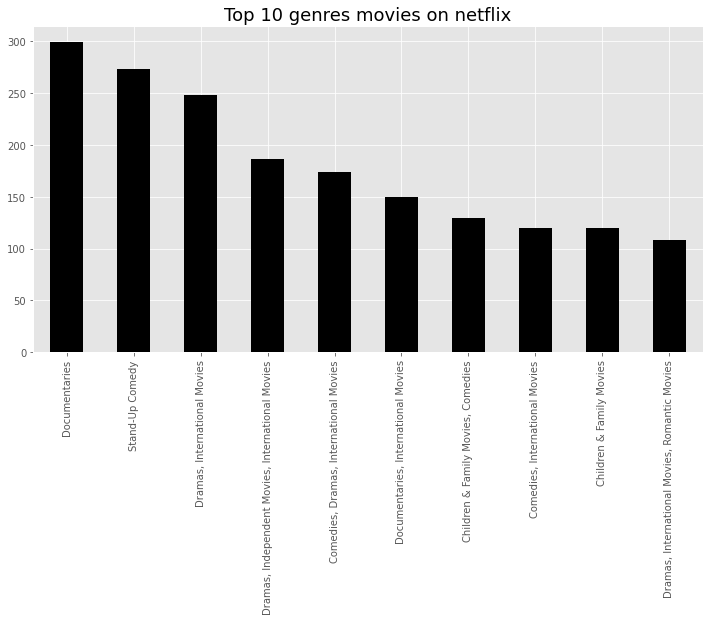

In [26]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
netflix_df[netflix_df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="bar",color="black")
plt.title("Top 10 genres movies on netflix",size=18)

###### Top 10 countries in terms of maximum number of TV shows on netflix

Text(0.5, 1.0, 'Top 10 countries in terms of maximum number of TV shows on netflix')

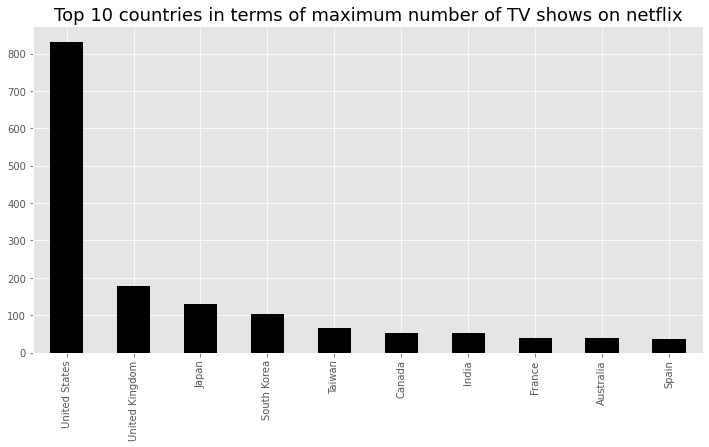

In [27]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
netflix_df[netflix_df["type"]=="TV Show"]["country"].value_counts()[:10].plot(kind="bar",color="black")
plt.title("Top 10 countries in terms of maximum number of TV shows on netflix",size=18)